## ViT(Vision Transformer) テスト

labels_mapは下のURLのもの

References
  - https://github.com/lukemelas/PyTorch-Pretrained-ViT/tree/master/examples/simple

In [ ]:
# pip install jupyter notebook
# pip install torch
# pip install torchvision
# pip install pytorch_pretrained_vit
# pip install matplotlib

In [2]:
import torch

from PIL import Image
from torchvision import transforms

from pytorch_pretrained_vit import ViT

import json

### 画像前処理

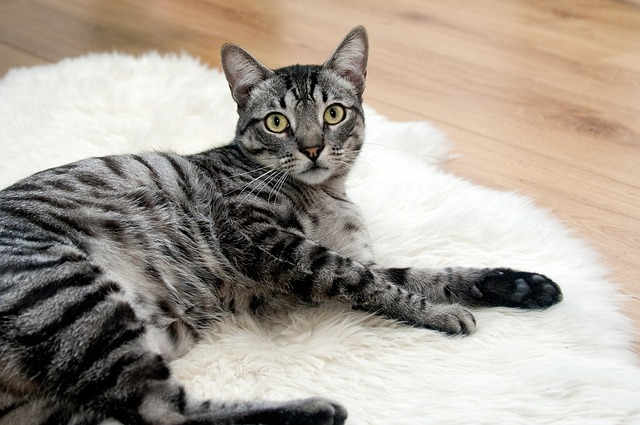

In [15]:
img_path = './img/cat01.jpg'

img = Image.open(img_path)
img

In [16]:
model = ViT('B_16_imagenet1k', pretrained=True)

model.image_size

Loaded pretrained weights.


(384, 384)

In [17]:
tfms = transforms.Compose([
    transforms.Resize(model.image_size), # サイズ変更 384x384
    transforms.ToTensor(), # Tensor型にする
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]) # 平均,標準偏差が0.5になるようにRBG変換
])

img = tfms(img)
img

tensor([[[ 0.1451,  0.1373,  0.1216,  ...,  0.4745,  0.4824,  0.4980],
         [ 0.1373,  0.1294,  0.1294,  ...,  0.4353,  0.4588,  0.4824],
         [ 0.1529,  0.1373,  0.1451,  ...,  0.3804,  0.4196,  0.4431],
         ...,
         [-0.4745, -0.4118, -0.3804,  ...,  0.8353,  0.8275,  0.8275],
         [-0.4431, -0.3804, -0.3725,  ...,  0.8353,  0.8353,  0.8353],
         [-0.3725, -0.3333, -0.3804,  ...,  0.8588,  0.8588,  0.8588]],

        [[-0.0353, -0.0431, -0.0588,  ...,  0.2627,  0.2706,  0.2863],
         [-0.0431, -0.0510, -0.0510,  ...,  0.2235,  0.2471,  0.2706],
         [-0.0196, -0.0353, -0.0275,  ...,  0.1686,  0.2078,  0.2314],
         ...,
         [-0.5294, -0.4667, -0.4353,  ...,  0.8510,  0.8588,  0.8588],
         [-0.4980, -0.4353, -0.4275,  ...,  0.8510,  0.8667,  0.8667],
         [-0.4431, -0.4039, -0.4431,  ...,  0.8745,  0.8902,  0.8902]],

        [[-0.1765, -0.1843, -0.2000,  ...,  0.0431,  0.0588,  0.0745],
         [-0.1843, -0.1922, -0.1922,  ...,  0

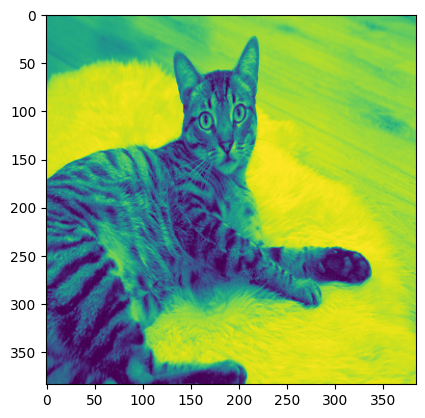

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img[0].view(384,384))

In [19]:
model

ViT(
  (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (positional_embedding): PositionalEmbedding1D()
  (transformer): Transformer(
    (blocks): ModuleList(
      (0): Block(
        (attn): MultiHeadedSelfAttention(
          (proj_q): Linear(in_features=768, out_features=768, bias=True)
          (proj_k): Linear(in_features=768, out_features=768, bias=True)
          (proj_v): Linear(in_features=768, out_features=768, bias=True)
          (drop): Dropout(p=0.1, inplace=False)
        )
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (pwff): PositionWiseFeedForward(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
      (1): Block(
 

In [20]:
print(img.shape)

img = img.unsqueeze(0)
print(img.shape)

torch.Size([3, 384, 384])
torch.Size([1, 3, 384, 384])


### 予測

In [22]:
with torch.no_grad():
    outputs = model(img).squeeze(0)

In [23]:
outputs.size()

torch.Size([1000])

In [35]:
pred = torch.argmax(outputs)

In [32]:
labels_map = json.load(open('labels_map.json'))

labels_map = list(labels_map.values())

In [36]:
labels_map[pred]

'Egyptian cat'